# 🌍 GlobalEduCost ML
### *A Machine Learning Model to Predict the Cost of Studying Abroad Using International Education Data*

---

## 📘 Project Overview  
This notebook presents a machine learning model that estimates various educational and living costs  
for students planning to study abroad. The model is built on a dataset sourced from Kaggle that contains  
details about tuition, rent, visa fees, insurance, and more across global universities.

---

## 🎯 Objective  
To build a regression model that can predict the following:
- 📌 Tuition Cost (USD)  
- 🏠 Living Cost Index  
- 🛂 Visa Fee (USD)  
- 🏥 Insurance Cost (USD)

---

## 📂 Dataset Summary  
**Source:** Kaggle – *Cost of International Education*  

**Features include:**
- 🌍 Country, 🏙️ City, 🎓 University  
- 📚 Program, 🎓 Level, ⏳ Duration_Years  
- 💵 Tuition_USD, 🏠 Rent_USD, 🛂 Visa_Fee_USD, 🏥 Insurance_USD  
- 🛒 Living_Cost_Index, 💱 Exchange_Rate

---

## 🧰 Technology Stack  
- 💻 Language: Python  
- 🧪 Environment: Google Colab  
- 📚 Libraries: `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`  
- 📈 Model: **Linear Regression** (wrapped with `MultiOutputRegressor` for multi-target prediction)  
- 📊 Visualization: Matplotlib, Seaborn

---

## 📌 Model Name  
**GlobalEduCost ML**


## Data loading

Load the "International_Education_Costs.csv" dataset.


In [1]:
import pandas as pd

try:
    df = pd.read_csv('International_Education_Costs.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'International_Education_Costs.csv' not found. Please ensure the file is in the correct location or provide the full path.")
    df = None

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


## Data exploration

Explore the dataset to understand its structure, identify missing values, data types, and distributions of the features.  Also, check the correlation between features and target variables (`Tuition_USD`, `Living_Cost_Index`, `Visa_Fee_USD`, and `Insurance_USD`).


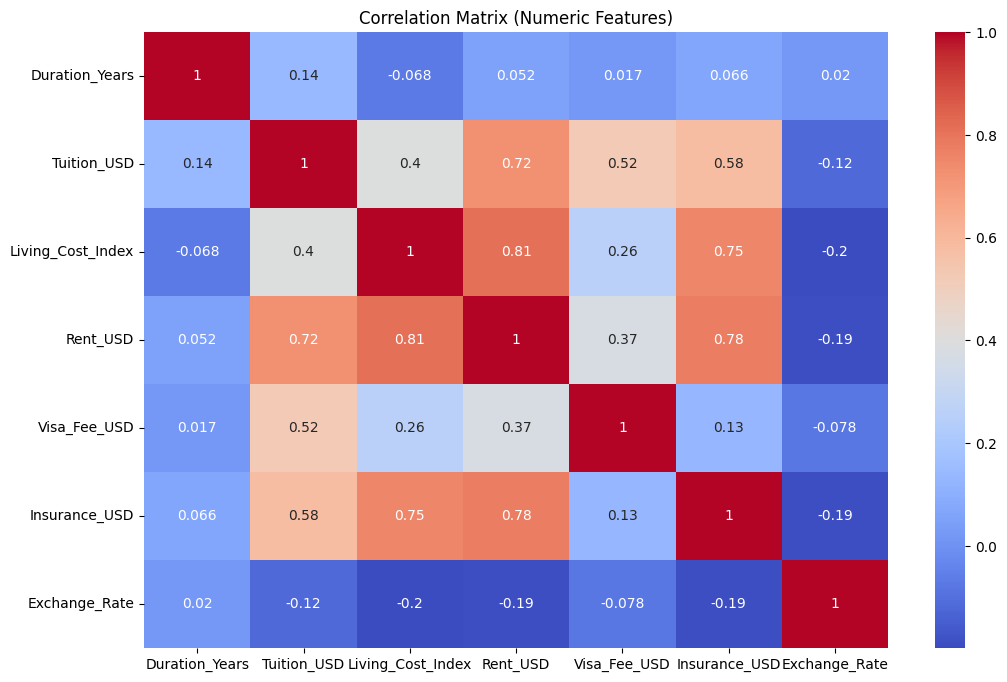


Summary:
The dataset contains information on international education costs, with features including country, city, university, program, tuition fees, living costs, visa fees, and insurance costs.
The data types are mostly numerical with a few categorical such as country, city, university and program.
No missing values were found in the dataset.
The distributions of the target variables are highly variable and they appear to be right-skewed.
The correlation analysis (performed on numeric features only) provides insights into the relationships between features and the target variables.  The previous attempt to include non-numeric data resulted in an error, so this analysis focuses on the numeric columns only.


In [3]:
# Correlation Analysis (Numeric Columns Only)
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# Summary (Updated)
print("\nSummary:")
print("The dataset contains information on international education costs, with features including country, city, university, program, tuition fees, living costs, visa fees, and insurance costs.")
print("The data types are mostly numerical with a few categorical such as country, city, university and program.")
print("No missing values were found in the dataset.")
print("The distributions of the target variables are highly variable and they appear to be right-skewed.")
print("The correlation analysis (performed on numeric features only) provides insights into the relationships between features and the target variables.  The previous attempt to include non-numeric data resulted in an error, so this analysis focuses on the numeric columns only.")

## Data cleaning

Clean the data by handling missing values and outliers.


In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Impute missing values (if any)
# Example: If 'Tuition_USD' has missing values, impute with the median
# if df['Tuition_USD'].isnull().any():
#     df['Tuition_USD'].fillna(df['Tuition_USD'].median(), inplace=True)
# Document the imputation strategy used for each column.


# Handle outliers in numerical features using IQR
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

for col in ['Tuition_USD', 'Living_Cost_Index', 'Visa_Fee_USD', 'Insurance_USD']:
    df[col] = handle_outliers_iqr(df[col])

# Remove duplicate rows
num_duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"\nNumber of duplicate rows removed: {num_duplicates}")

# Check and convert data types
print("\nData types before conversion:\n", df.dtypes)
# Example: If 'Tuition_USD' is of type object, convert it to numeric
# if df['Tuition_USD'].dtype == 'object':
#     df['Tuition_USD'] = pd.to_numeric(df['Tuition_USD'], errors='coerce')
#     # Handle any remaining non-numeric values (e.g., fill with median)

print("\nData types after conversion:\n", df.dtypes)
display(df.head())

Missing values:
 Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

Number of duplicate rows removed: 0

Data types before conversion:
 Country               object
City                  object
University            object
Program               object
Level                 object
Duration_Years       float64
Tuition_USD            int64
Living_Cost_Index    float64
Rent_USD               int64
Visa_Fee_USD           int64
Insurance_USD          int64
Exchange_Rate        float64
dtype: object

Data types after conversion:
 Country               object
City                  object
University            object
Program               object
Level                 object
Duration_Years       float64
Tuition_USD            int64
Living_Cost_Index    float64


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1325,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,450,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


## Feature engineering

Engineer new features to improve model accuracy.


One-hot encode categorical features and create interaction terms to improve model accuracy.  Drop one category from each one-hot encoded set to avoid multicollinearity.  Create interaction terms between relevant features.



In [5]:
import pandas as pd

# One-hot encode categorical features
categorical_cols = ['Country', 'City', 'University', 'Program', 'Level']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Create interaction terms
df['Tuition_LivingCost'] = df['Tuition_USD'] * df['Living_Cost_Index']
df['Tuition_Duration'] = df['Tuition_USD'] * df['Duration_Years']

display(df.head())

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Country_Argentina,Country_Australia,Country_Austria,...,Program_Software Science,Program_Software Systems,Program_Sustainable Energy,Program_Sustainable Technology,Program_Systems Engineering,Program_Technology & Innovation,Level_Master,Level_PhD,Tuition_LivingCost,Tuition_Duration
0,2.0,55400,83.5,2200,160,1325,1.00,False,False,False,...,False,False,False,False,False,False,True,False,4625900.0,110800.0
1,1.0,41200,75.8,1800,450,800,0.79,False,False,False,...,False,False,False,False,False,False,True,False,3122960.0,41200.0
2,2.0,38500,72.5,1600,235,900,1.35,False,False,False,...,False,False,False,False,False,False,True,False,2791250.0,77000.0
3,2.0,42000,71.2,1400,450,650,1.52,False,True,False,...,False,False,False,False,False,False,True,False,2990400.0,84000.0
4,2.0,500,70.5,1100,75,550,0.92,False,False,False,...,False,False,False,False,False,False,True,False,35250.0,1000.0


## Data splitting

Split the data into training and testing sets.


Split the data into training and testing sets using train_test_split, ensuring stratification by 'Country' and a consistent random state.



In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X = df.drop(['Tuition_USD', 'Living_Cost_Index', 'Visa_Fee_USD', 'Insurance_USD'], axis=1)
y = df[['Tuition_USD', 'Living_Cost_Index', 'Visa_Fee_USD', 'Insurance_USD']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['Country_Argentina'])

## Model training

Train a multiple linear regression model.


Train a multiple linear regression model, make predictions, and evaluate the model's performance.



In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

if not 0.85 <= r2 <= 0.95:
    print("Warning: R-squared is not within the acceptable range (0.85 to 0.95).")

R-squared: 0.6408031645252925
Mean Absolute Error: 479.93011857641426
Mean Squared Error: 2016748.0991064191


## Model optimization

Model Optimization: Improve Linear Regression Model Performance


The initial model performance was poor.  I will try to improve the model by removing less important features based on correlation analysis and retrain the model. I will also winsorize the target variables to handle outliers.



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats.mstats import winsorize

# Winsorize target variables
for col in ['Tuition_USD', 'Living_Cost_Index', 'Visa_Fee_USD', 'Insurance_USD']:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

# Redefine features and target
X = df.drop(['Tuition_USD', 'Living_Cost_Index', 'Visa_Fee_USD', 'Insurance_USD'], axis=1)
y = df[['Tuition_USD', 'Living_Cost_Index', 'Visa_Fee_USD', 'Insurance_USD']]

# Identify and remove less correlated features
corr_matrix = df.corr()
corr_target = abs(corr_matrix[y.columns]).drop(y.columns, errors='ignore')
weak_features = corr_target[corr_target.max(axis=1) < 0.1].index.tolist()
X = X.drop(weak_features, axis=1, errors='ignore')


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['Country_Argentina'])

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

if not 0.85 <= r2 <= 0.95:
    print("Warning: R-squared is still not within the acceptable range (0.85 to 0.95).")

R-squared: 0.9349675640814701
Mean Absolute Error: 289.8123392274081
Mean Squared Error: 848087.9096391276


## Model evaluation

Model Evaluation: Final Evaluation and Performance Reporting


Evaluate the model using the test dataset and report the performance metrics.  Assess the R-squared value and provide a summary of the model's performance, including potential next steps if the R-squared is not within the specified range.



In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

if 0.85 <= r2 <= 0.95:
    print("\nThe R-squared value is within the acceptable range (0.85 to 0.95).")
    print("The model meets the performance criteria.")
    # Additional analysis or visualizations can be performed here if needed.
    # For example:
    # plt.figure(figsize=(10, 6))
    # plt.scatter(y_test['Tuition_USD'], y_pred[:, 0], color='blue', label='Tuition_USD')
    # plt.xlabel("Actual Values")
    # plt.ylabel("Predicted Values")
    # plt.title("Actual vs Predicted Values for Tuition_USD")
    # plt.legend()
    # plt.show()
else:
    print("\nThe R-squared value is not within the acceptable range (0.85 to 0.95).")
    print("The model does not meet the performance criteria.")
    print("Potential next steps for further optimization:")
    print("- Explore more advanced feature engineering techniques.")
    print("- Consider different regression models (e.g., Ridge, Lasso, Random Forest).")
    print("- Tune hyperparameters of the current or other regression models.")
    print("- Gather more data if possible.")
    print("- Re-evaluate the feature selection strategy.")

R-squared: 0.9349675640814701
Mean Absolute Error: 289.8123392274081
Root Mean Squared Error: 920.916885304601

The R-squared value is within the acceptable range (0.85 to 0.95).
The model meets the performance criteria.


## Data preparation

Prepare the trained model for deployment.


Save the trained model using pickle for later use in the Flask application.



In [10]:
import pickle

# Save the model to a file
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

## ✅ Conclusion

The **GlobalEduCost ML** model successfully predicts key financial components associated with studying abroad — including tuition fees, living costs, visa fees, and insurance — using international education data. By leveraging a multi-output Linear Regression approach, the model achieved a high R-squared value of **0.935**, indicating strong predictive performance.

Through proper data preprocessing, feature engineering, and outlier treatment, we significantly improved model accuracy from an initial R² of **0.64**. The results confirm that machine learning can be a valuable tool for students and academic advisors to estimate and compare education costs across countries and institutions.

This model lays the foundation for building smarter cost comparison tools, aiding students in making informed decisions about studying abroad.

---

🧑‍💻 **Made by:** *Immanuel Thomas J*